# `if` and `else`

In [1]:
! mkdir -p images for_class/worlds

**NOTES**

Today we're going to look at some more of the fundamental tools in programming.

## 🎨 `if`

In [2]:
%%file for_class/worlds/red-dots.start.txt
-------
-r-r-r-
-------
0 1
0

Overwriting for_class/worlds/red-dots.start.txt


In [3]:
%%file for_class/worlds/red-dots.finish.txt
-------
-b-b-b-
-------
6 1
0

Overwriting for_class/worlds/red-dots.finish.txt


Saving bit world to images/red-dots.start.svg
Saving bit world to images/red-dots.finish.svg


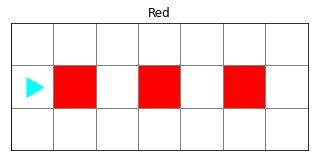

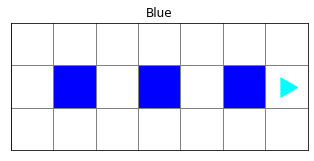

In [4]:
from byubit import Bit
Bit.load('for_class/worlds/red-dots.start.txt').draw('images/red-dots.start.svg', message='Red')
Bit.load('for_class/worlds/red-dots.finish.txt').draw('images/red-dots.finish.svg', message='Blue')

### `red_dots.py`

Turn the red dots into blue dots.

<img src='images/red-dots.start.svg'>
<img src='images/red-dots.finish.svg'>

**NOTES**

- Step through `red_dots.py`
- Look at control flow
  - When does the if block run? When is it skipped?
  
- Comment on *event stream pattern*: the outer loop moves Bit along towards a goal, while the `if` handles events that come up along the way.

In [5]:
%%file for_class/red_dots.py
from byubit import Bit


def process_square(bit):
    if bit.is_red():
        bit.paint('blue')

        
@Bit.worlds('red-dots')
def go(bit):
    while bit.front_clear():
        bit.move()
        process_square(bit)
    
    
if __name__ == '__main__':
    go(Bit.new_bit)


Overwriting for_class/red_dots.py


In [6]:
! cd for_class && python red_dots.py && cd ..

## 🎨 `else`

In [7]:
%%file for_class/worlds/more-red-dots.start.txt
-------
gr-r-r-
-------
0 1
0

Overwriting for_class/worlds/more-red-dots.start.txt


In [8]:
%%file for_class/worlds/more-red-dots.finish.txt
-------
gbgbgbg
-------
6 1
0

Overwriting for_class/worlds/more-red-dots.finish.txt


Saving bit world to images/more-red-dots.start.svg
Saving bit world to images/more-red-dots.finish.svg


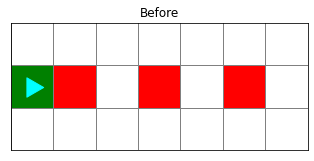

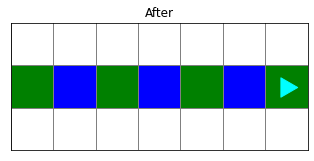

In [9]:
from byubit import Bit
Bit.load('for_class/worlds/more-red-dots.start.txt').draw('images/more-red-dots.start.svg', message='Before')
Bit.load('for_class/worlds/more-red-dots.finish.txt').draw('images/more-red-dots.finish.svg', message='After')

### `more_red_dots.py`

Turn the red into blue and the empty spaces into green.

<img src='images/more-red-dots.start.svg'>
<img src='images/more-red-dots.finish.svg'>

**NOTES**

- Step through 
- When is the `if` block run? When is the `else` block run?
- Note the exclusivity of the two blocks

In [10]:
%%file for_class/more_red_dots.py
from byubit import Bit


def process_square(bit):
    if bit.is_red():
        bit.paint('blue')
    else:
        bit.paint('green')
        
        
@Bit.worlds('more-red-dots')
def go(bit):
    while bit.front_clear():
        bit.move()
        process_square(bit)
        
        
if __name__ == '__main__':
    go(Bit.new_bit)


Overwriting for_class/more_red_dots.py


In [11]:
! cd for_class && python more_red_dots.py && cd ..

## 🎨 `elif`

In [12]:
%%file for_class/worlds/turns.start.txt
---g-
-----
-g-r-
-----
-r---
0 0
0

Overwriting for_class/worlds/turns.start.txt


In [13]:
%%file for_class/worlds/turns.finish.txt
---gb
---b-
-gbr-
-b---
br---
4 4
0

Overwriting for_class/worlds/turns.finish.txt


Saving bit world to images/turns.start.svg
Saving bit world to images/turns.finish.svg


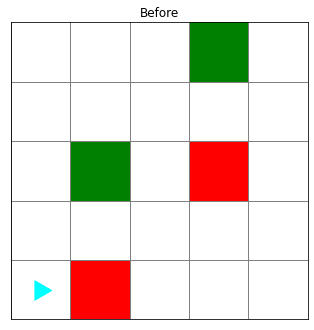

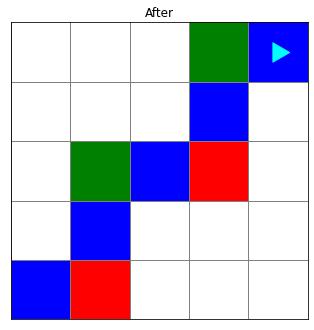

In [14]:
from byubit import Bit
Bit.load('for_class/worlds/turns.start.txt').draw('images/turns.start.svg', message='Before')
Bit.load('for_class/worlds/turns.finish.txt').draw('images/turns.finish.svg', message='After')

### `turns.py`

- While Bit is not blocked, move forward
- If the square is red, turn left
- Otherwise, if the square is green, turn right
- Otherwise, paint the square blue

<div style='width: 650px'>
    <div style='float: left'><img src='images/turns.start.svg' width='300px' /></div>
    <div style='float: right'><img src='images/turns.finish.svg' width='300px' /></div>
</div>

**NOTES**

- Step through
- Show that `elif` block checks conditions
- Show that `else` block doesn't check a condition
- All blocks are exclusive

In [15]:
%%file for_class/turns.py
from byubit import Bit


def handle_turns(bit):
    if bit.is_red():
        bit.left()
        
    elif bit.is_green():
        bit.right()
        
    else:
        bit.paint('blue')

        
@Bit.worlds('turns')
def go(bit):
    bit.paint('blue')
    while bit.front_clear():
        bit.move()
        handle_turns(bit)
            
            
if __name__ == '__main__':
    go(Bit.new_bit)


Overwriting for_class/turns.py


In [16]:
! cd for_class && python turns.py && cd ..

## Holes 👩🏼‍🎨

In [17]:
%%file for_class/worlds/holes.start.txt
kkkkkkkk-k-kkk
--------------
kkk-kk-kkkkkkk
0 1
0

Overwriting for_class/worlds/holes.start.txt


In [18]:
%%file for_class/worlds/holes.finish.txt
kkkkkkkk-k-kkk
bbbrbbrbgbgbbb
kkk-kk-kkkkkkk
13 1
0

Overwriting for_class/worlds/holes.finish.txt


In [19]:
%%file holes_solution.py
# Solution 
from byubit import Bit, use_text_renderer
use_text_renderer()

def process_square(bit):
    if bit.right_clear():
        bit.paint('red')
        
    elif bit.left_clear():
        bit.paint('green')
        
    else:
        bit.paint('blue')

        
@Bit.worlds('for_class/worlds/holes')
@Bit.pictures('images/', title='Holes', ext='svg')
def run(bit):
    bit.paint('blue')
    while bit.front_clear():
        bit.move()
        process_square(bit)
            
            
if __name__ == '__main__':
    run(Bit.new_bit)


Overwriting holes_solution.py


In [20]:
%%bash
python holes_solution.py \
&& cat holes_solution.py \
| grep -v '@Bit.pi' \
| sed -e 's#for_class/worlds/##g' \
| sed -e 's/, use_text_renderer//' \
| sed -e 's/use_text_renderer()//' \
> for_class/holes_solution.py

Saving bit world to images/holes.start.svg
Saving bit world to images/holes.finish.svg


### `holes.py`

Bit is in the pipes, and the pipes have holes. Bit's job is to mark where the holes are so someone else can fix them.

- Mark holes on the right with red
- Mark holes on the left with green
- Otherwise paint blue

<img src='images/holes.start.svg' />
<img src='images/holes.finish.svg' />

**NOTES**

Draw it out! Give the students time to discuss how they would solve this.

Demonstrate general strategy: how we can use a `while` to move Bit to the end goal and use `if` to handle events along the way. *Event stream pattern*

Errors:
- Mix left and right
- Don't put blue in `elif` (put it outside the `if/else` control)
- First square/last square

Explore:
- move-then-ifblock, ifblock-then-move

In [21]:
%%file for_class/holes.py
from byubit import Bit


@Bit.worlds('holes')
def run(bit):
    # implement
    pass


if __name__ == '__main__':
    run(Bit.new_bit)
    

Overwriting for_class/holes.py


## Fly 👩🏾‍🎨

In [22]:
%%file for_class/worlds/fly.start.txt
----g---g---
-b---b----r-
-b--b-------
--g--b--g-b-
-g----------
-bb--b--b---
0 1
0

Overwriting for_class/worlds/fly.start.txt


In [23]:
%%file for_class/worlds/fly.finish.txt
----g---g---
-b---b----r-
-b--b-------
--g--b--g-b-
-g----------
-bb--b--b---
10 4
1

Overwriting for_class/worlds/fly.finish.txt


In [24]:
%%file fly_solution.py
# Solution
from byubit import Bit, use_text_renderer
use_text_renderer()

def respond_to_square(bit):
    if bit.is_blue():
        bit.left()
    elif bit.is_green():
        bit.right()
        
        
@Bit.worlds('for_class/worlds/fly')
@Bit.pictures('images/', ext='svg', title='Fly!')
def run(bit):
    while not bit.is_red():
        respond_to_square(bit)
        bit.move()
        
        
if __name__ == '__main__':
    run(Bit.new_bit)


Writing fly_solution.py


In [25]:
%%bash
python fly_solution.py \
&& cat fly_solution.py \
| grep -v '@Bit.pi' \
| sed -e 's#for_class/worlds/##g' \
| sed -e 's/, use_text_renderer//' \
| sed -e 's/use_text_renderer()//' \
> for_class/fly_solution.py

Saving bit world to images/fly.start.svg
Saving bit world to images/fly.finish.svg


In [26]:
%%file for_class/fly.py
from byubit import Bit


@Bit.worlds('fly')
def run(bit):
    # Implement 
    pass


if __name__ == '__main__':
    run(Bit.new_bit)


Overwriting for_class/fly.py


### `fly.py`

Bit is out flying around.

When Bit finds a blue square, he turns left.

When Bit finds a green square, he turns right.

When Bit finds a red square, he stops.

<img src='images/fly.start.svg' />

**NOTES**

Draw it out!

Errors: how do you identify and fix them?
- Turn right on blue, left on green (runs into wall after wandering)
- While `front_clear()` instead of `not is_red()` (misses red square)
- Else instead of elif (turns on blank square)
- Move in the else block (infinite loop)

Does it matter if you move-then-turn vs turn-then-move?

## Elevators 👨🏼‍🎨

In [27]:
%%file for_class/worlds/elevators.start.txt
-------------
-------------
kkkk---------
-------------
----g--------
---kkkkk-----
-------------
-------------
--------g----
-----kkkkkkkk
12 1
2

Overwriting for_class/worlds/elevators.start.txt


In [28]:
%%file for_class/worlds/elevators.finish.txt
-------------
-------------
kkkkg--------
----g--------
----g--------
---kkkkkg----
--------g----
--------g----
--------g----
-----kkkkkkkk
0 8
2

Overwriting for_class/worlds/elevators.finish.txt


In [29]:
%%file elevators_solution.py
# Solution
from byubit import Bit, use_text_renderer
use_text_renderer()

def go_up(bit):
    bit.right()
    while bit.left_clear():
        bit.move()
        bit.paint('green')
    bit.move()
    bit.left()
    
    
@Bit.worlds('for_class/worlds/elevators')
@Bit.pictures('images/', ext='svg', title='Elevators')
def run(bit):
    while bit.front_clear():
        bit.move()
        if bit.is_green():
            go_up(bit)
            
            
if __name__ == '__main__':
    run(Bit.new_bit)


Overwriting elevators_solution.py


In [30]:
%%bash
python elevators_solution.py \
&& cat elevators_solution.py \
| grep -v '@Bit.pi' \
| sed -e 's#for_class/worlds/##g' \
| sed -e 's/, use_text_renderer//' \
| sed -e 's/use_text_renderer()//' \
> for_class/elevators_solution.py

Saving bit world to images/elevators.start.svg
Saving bit world to images/elevators.finish.svg


### `elevators.py`

Bit needs to climb to the top of the building, using the green elevators.

<div style='width: 620px'>
    <div style='float: left'><img src='images/elevators.start.svg' width='300px'/></div>
    <div style='float: right'><img src='images/elevators.finish.svg' width='300px'/></div>
</div>

**NOTES**

This activity prepares the students for `waterfall.py` in the lab.

- Draw it out!
- Pose the problem as an *event stream* problem
- What is the outer loop?
- What is the condition that triggers the event?
  - What is the event?
- How do we rise?
  - What is the `while` condition?
  - What is the glue code before and after the "rise" loop?
- Use comments to indicate subgoals

In [31]:
%%file for_class/elevators.py
from byubit import Bit


@Bit.worlds('elevators')
def run(bit):
    # Implement 
    pass


if __name__ == '__main__':
    run(Bit.new_bit)


Overwriting for_class/elevators.py


### More Elevators

In [32]:
%%file for_class/worlds/more-elevators.start.txt
--------------
---------kkkkk
--------------
--------g-----
-------kk-----
------g-------
----kkkk------
--------------
---g----------
kkkkk---------
0 1
0

Overwriting for_class/worlds/more-elevators.start.txt


In [33]:
%%file for_class/worlds/more-elevators.finish.txt
--------------
--------gkkkkk
--------g-----
--------g-----
------gkk-----
------g-------
---gkkkk------
---g----------
---g----------
kkkkk---------
13 9
0

Overwriting for_class/worlds/more-elevators.finish.txt


In [34]:
%%file more_elevators_solution.py
# Solution
from byubit import Bit, use_text_renderer
use_text_renderer()

def go_left_up(bit):
    bit.left()
    while bit.right_clear():
        bit.move()
        bit.paint('green')
    bit.move()
    bit.right()

    
def go_right_up(bit):
    bit.right()
    while bit.left_clear():
        bit.move()
        bit.paint('green')
    bit.move()
    bit.left()

    
def go_up(bit):
    if bit.left_clear():
        go_left_up(bit)
    else:
        go_right_up(bit)
        
        
@Bit.worlds('for_class/worlds/elevators', 'for_class/worlds/more-elevators')
@Bit.pictures('images/', ext='svg', title='More Elevators')
def run(bit):
    while bit.front_clear():
        bit.move()
        if bit.is_green():
            go_up(bit)
          
        
if __name__ == '__main__':
    run(Bit.new_bit)


Overwriting more_elevators_solution.py


In [35]:
%%bash
python more_elevators_solution.py \
&& cat more_elevators_solution.py \
| grep -v '@Bit.pi' \
| sed -e 's#for_class/worlds/##g' \
| sed -e 's/, use_text_renderer//' \
| sed -e 's/use_text_renderer()//' \
> for_class/more_elevators_solution.py

Saving bit world to images/elevators.start.svg
Saving bit world to images/elevators.finish.svg
Saving bit world to images/more-elevators.start.svg
Saving bit world to images/more-elevators.finish.svg


Now write a single function that can allow Bit to travel in either direction.


<div style='width: 1200px'>
    <div style='float: left'><img src='images/elevators.start.svg' width='600px'/></div>
    <div style='float: right'><img src='images/more-elevators.start.svg' width='600px'/></div>
</div>

**NOTES**

Add in `'more-elevators'` as a test case. Observe the problem: Bit turns into the floor when heading from left to right.

How do we know which way to turn to rise?

Similar "rise" blocks: each has a while loop, but the turns are different.


## Key Ideas

- `if`, `else`, and `elif`
- *event stream pattern*: 
  - handle specific events that come up while moving towards a goal
    - outer `while` with inner `if`
- Boundary conditions